In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
df = pd.read_excel('Topic_Survey_Assignment.xlsx',index_col=0)
df.head(10) 

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Create a bar plot
Sort the data frame using the "Very interested" column in descending order

In [3]:
df = df.sort_values(by=['Very interested'], axis = 0, ascending=False)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [4]:
df = round(df/2233, 2)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06


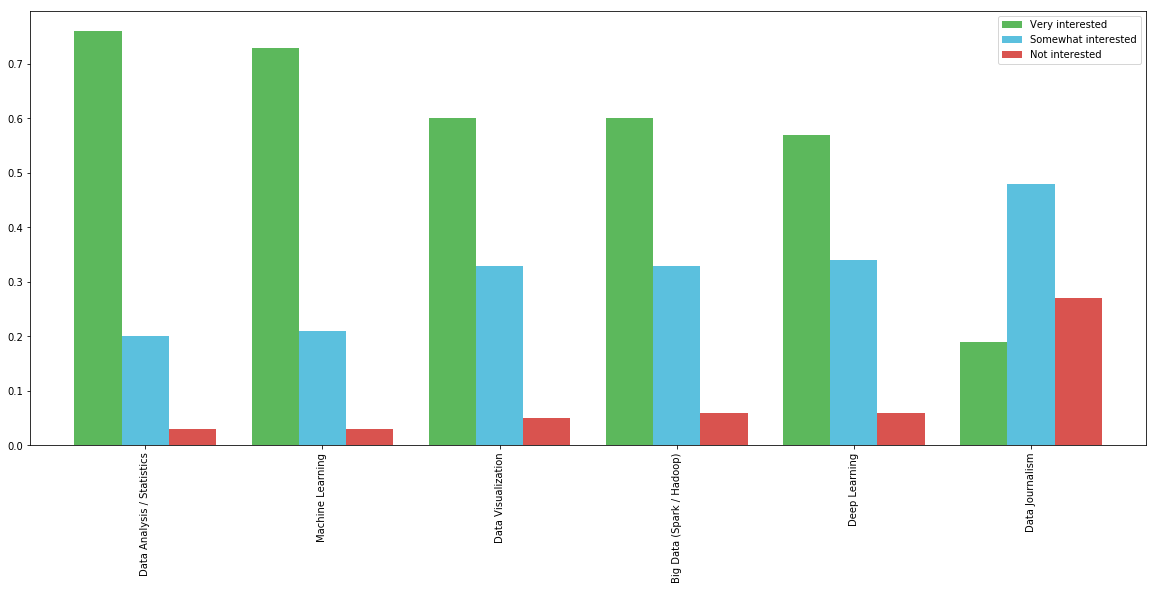

In [5]:
# plot barplot
df.plot(kind='bar',
       figsize=(20, 8),
       width=0.8,
       color=('#5cb85c', '#5bc0de', '#d9534f'))


# Create annotation texts and location based on dataframe , fontsize=16)


plt.show()

## Read SF Crime data

In [6]:
#Data Collection
# df_sf_crime = pd.read_excel('https://cocl.us/sanfran_crime_dataset')
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
print ('Data read into a pandas dataframe!')
df.head()

Data read into a pandas dataframe!


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [7]:
# get the frequency of occurence of values in PdDistrict column in a list
dataTemp = df['PdDistrict'].value_counts()
# Convert to a dataframe
df2 = pd.DataFrame(data = dataTemp)
# set index:
df2 = df2.reset_index()
# rename columns
df2.rename(columns={'index':'Neighberhood', 'PdDistrict':'Count'}, inplace=True)
# display dataframe
df2.head(11)

,Neighberhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [8]:
from IPython.display import HTML
def display(m, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/cherhan/anaconda3/envs/vanessa

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.1.0               |           py37_0         722 KB  conda-forge
    asn1crypto-0.24.0          |        py37_1003         154 KB  conda-forge
    attrs-19.1.0               |             py_0          32 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    bzip2-1.0.8                |       h01d97ff_0         148 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py37_1

In [ ]:
# Read data:
# df_sf_crime = pd.read_excel('https://cocl.us/sanfran_crime_dataset')
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
print ('Data read into a pandas dataframe!')

In [22]:
# define the SF map centered around SF with a low zoom level
SF_map = folium.Map(location=[37.77, -122.42], zoom_start=12, tiles='Mapbox Bright')

# display SF map

SF_geo = 'san-francisco.geojson' # geojson file

# create a plain world map
SF_map = folium.Map(location=[37.77, -122.42], zoom_start=11.5)

SF_map


In [12]:
# generate choropleth map using the total crime numbers per district for SF
SF_map.choropleth(
    geo_data=SF_geo,
    data=df2,
    columns=['Neighberhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
folium.LayerControl().add_to(SF_map)
# display map
SF_map

NameError: name 'SF_map' is not defined